In [260]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDRegressor

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


%matplotlib inline
plt.style.use('seaborn')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

### DataDescription
* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the 
        hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
* restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing

# Load my data

In [261]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, header=None)
header = ['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'serum_cholesterol', 'fasting_blood_sugar',
          'resting_electrocardiographic', 'maximum_heart_rate', 'exercise_induced_angina', 'oldpeak',
          'slope', 'num_major_vessels', 'thal','heart_disease']
df.columns = header

df.head()
# heart_disease is my target varaible

,age,sex,chest_pain,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,num_major_vessels,thal,heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [262]:
# 303 rows and 14 columns
df.shape

(303, 14)

In [263]:
df.describe()

,age,sex,chest_pain,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [264]:
df.info()
# there is no nan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                             303 non-null float64
sex                             303 non-null float64
chest_pain                      303 non-null float64
resting_blood_pressure          303 non-null float64
serum_cholesterol               303 non-null float64
fasting_blood_sugar             303 non-null float64
resting_electrocardiographic    303 non-null float64
maximum_heart_rate              303 non-null float64
exercise_induced_angina         303 non-null float64
oldpeak                         303 non-null float64
slope                           303 non-null float64
num_major_vessels               303 non-null object
thal                            303 non-null object
heart_disease                   303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [265]:
# there are 4 '?' in the num_major_vessels column
df[df.num_major_vessels == '?']

,age,sex,chest_pain,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,num_major_vessels,thal,heart_disease
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [266]:
# there are 2 '?' in the thal column
df[df.thal == '?']

,age,sex,chest_pain,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,num_major_vessels,thal,heart_disease
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


In [267]:
# since the are only 0.0198 of the dataset, i will just drop them
df = df.replace('?', np.nan)
df = df.dropna()

In [268]:
df['sex'] = df.sex.astype('category')
df['fasting_blood_sugar'] = df.fasting_blood_sugar.astype('category')
df['resting_electrocardiographic'] = df.resting_electrocardiographic.astype('category')
df['exercise_induced_angina'] = df.exercise_induced_angina.astype('category')
df['slope'] = df.slope.astype('category')
df['num_major_vessels'] = df.num_major_vessels.astype('category')
df['thal'] = df.thal.astype('category')

# Check if my target varaible imbalance?

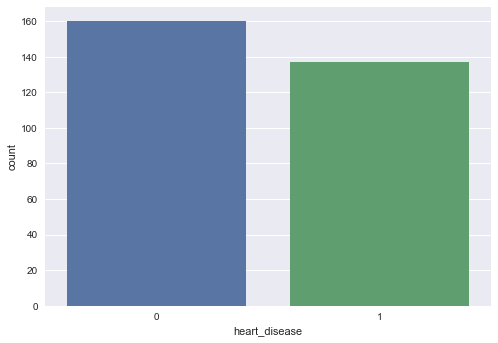

In [269]:
df['heart_disease'] = df.heart_disease.astype('category')
df['heart_disease'] = df.heart_disease.replace([2, 3, 4], 1)
sns.countplot(x="heart_disease", data=df,)
plt.xlim(-0.5, 1.5);

In [270]:
print('how many labeled as 0:', len(df[df.heart_disease == 0]))
print('what is the fraction of 0:', round(len(df[df.heart_disease == 0])/len(df), 4))

how many labeled as 0: 160
what is the fraction of 0: 0.5387


In [271]:
print('how many labeled as 1:', len(df[df.heart_disease != 0]))
print('what is the fraction of 1:', round(len(df[df.heart_disease != 0])/len(df), 4))

how many labeled as 1: 137
what is the fraction of 1: 0.4613


My dataset is not imbalance

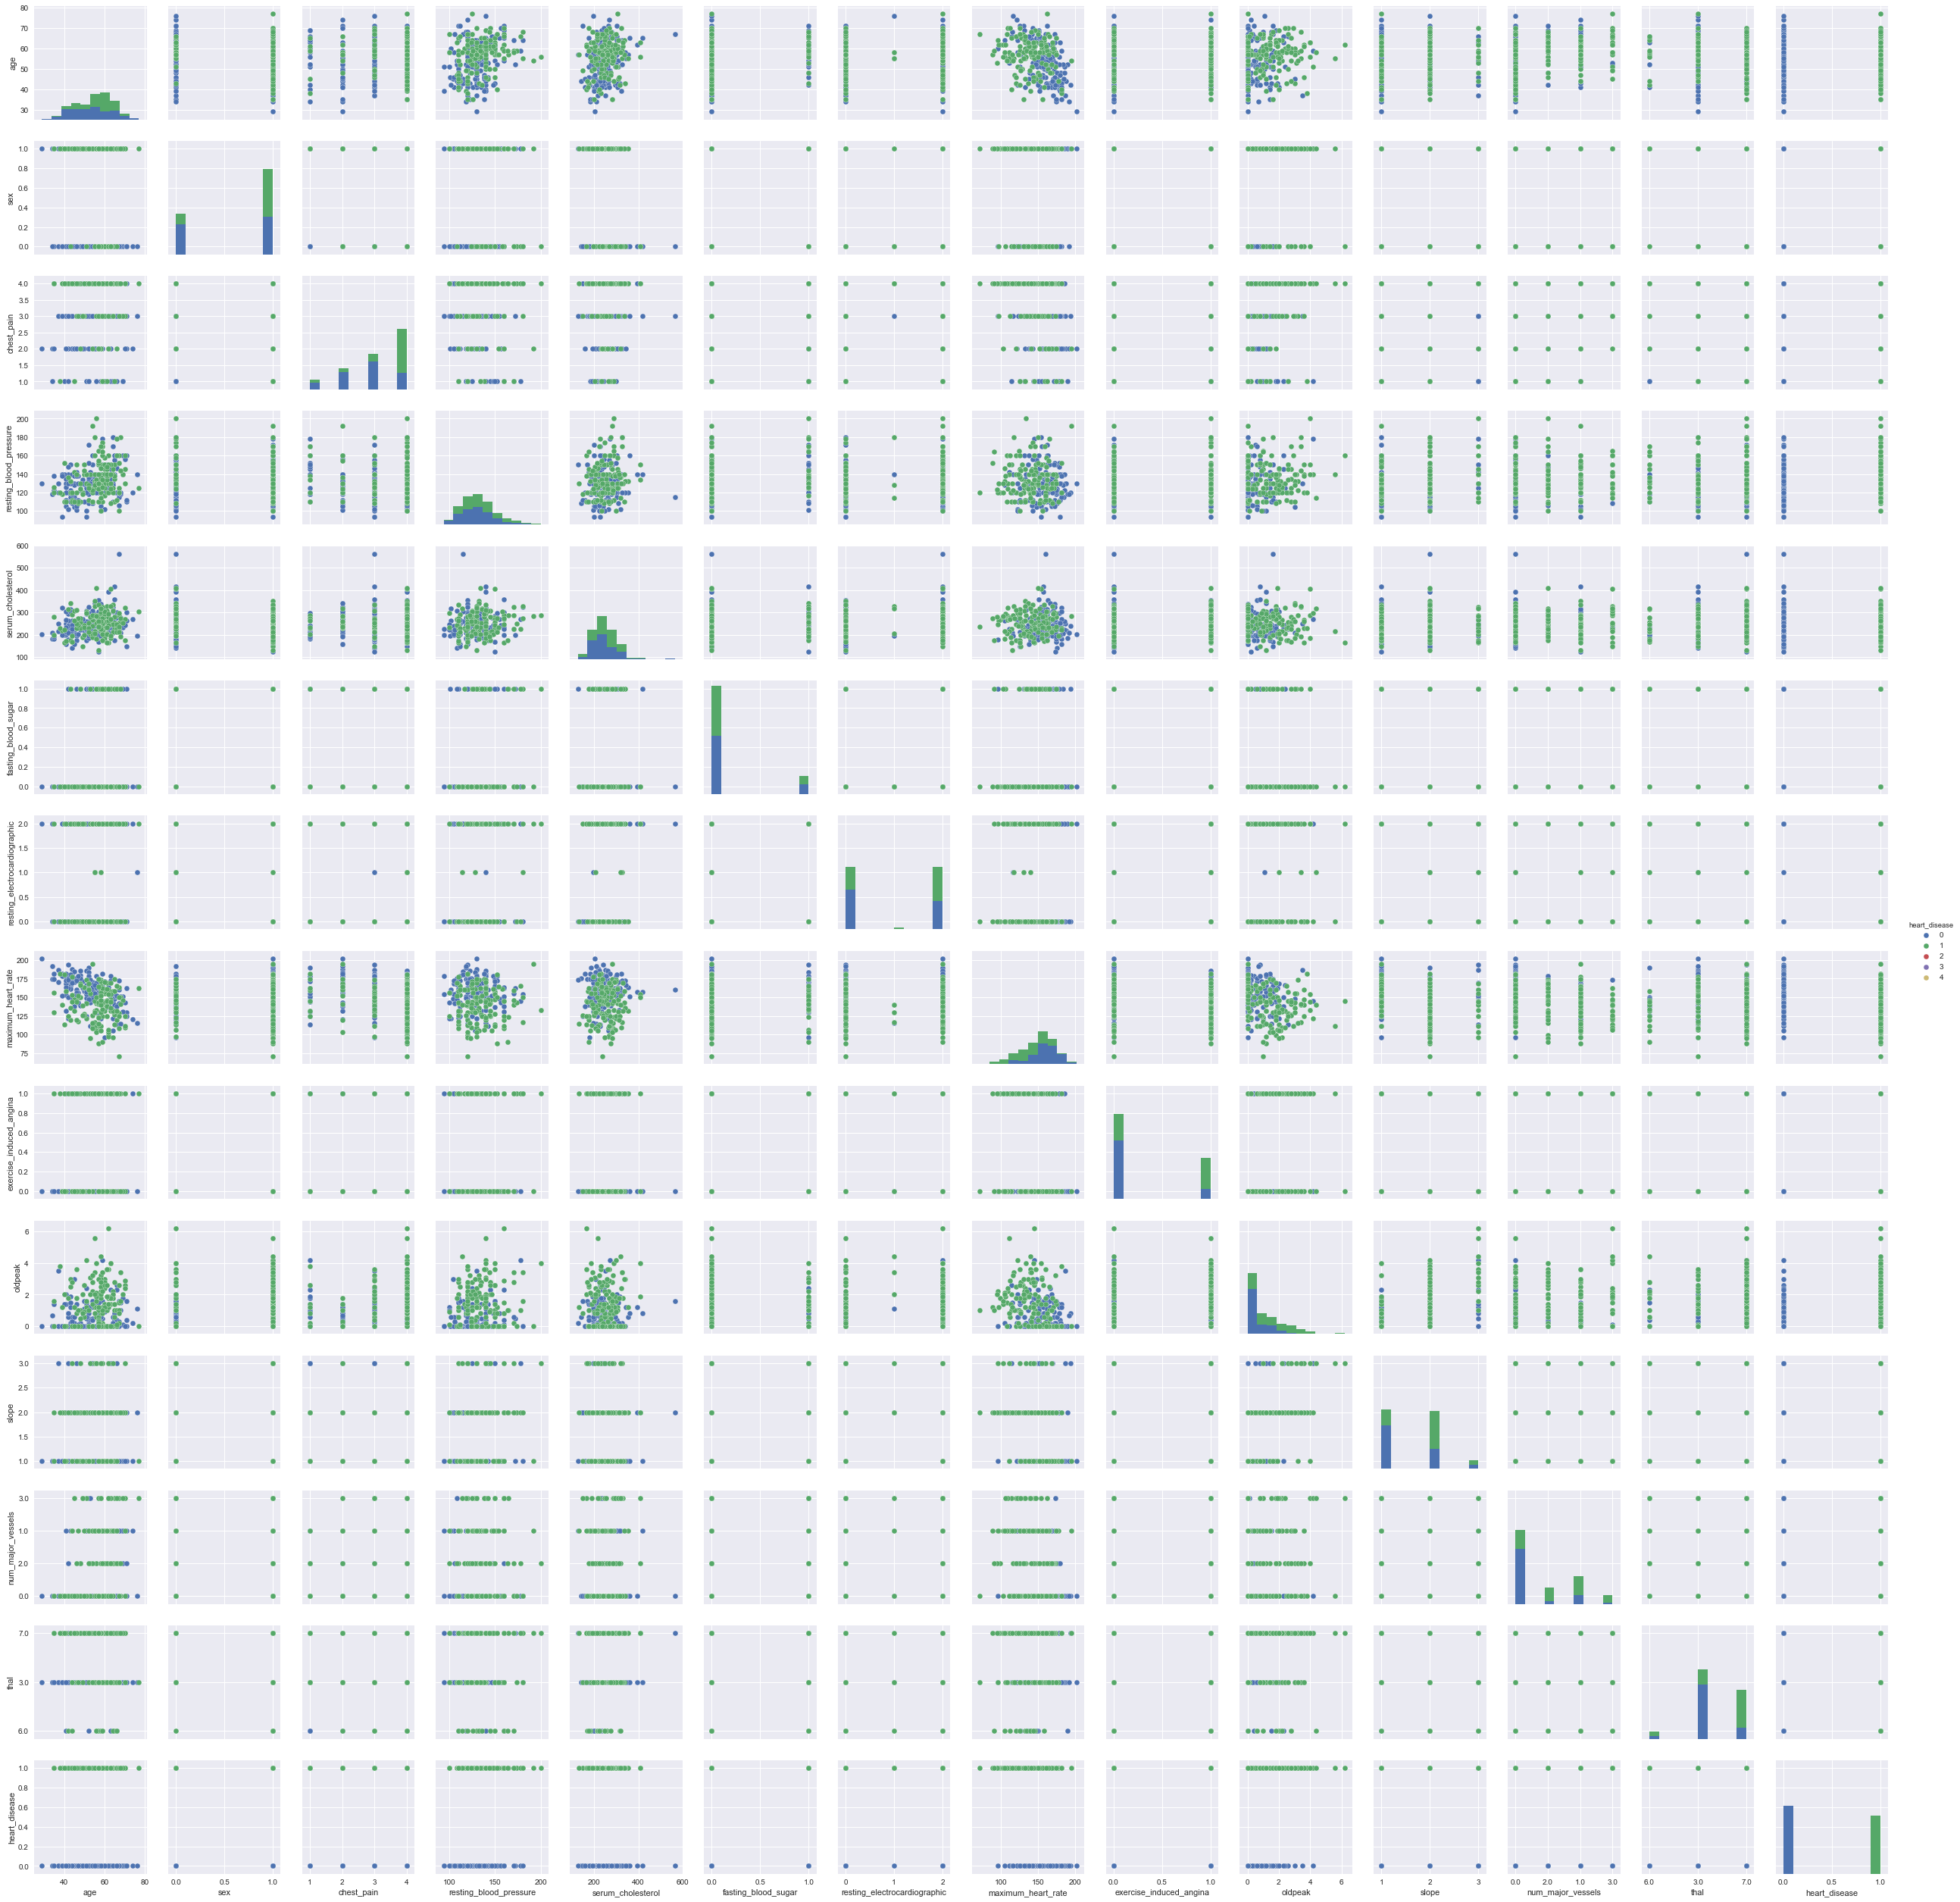

In [203]:
sns.pairplot(df, hue='heart_disease');

# Get Dummies

In [272]:
pd.set_option('display.max_columns', 500)
clean_df = pd.concat([df.heart_disease, pd.get_dummies(data=df, columns=['chest_pain', 'resting_electrocardiographic', 'slope', 'num_major_vessels', 'thal'], 
               drop_first=True).drop('heart_disease', axis=1)], axis=1)

In [273]:
# this will be my cleaned df
clean_df.head()

,heart_disease,age,sex,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,maximum_heart_rate,exercise_induced_angina,oldpeak,chest_pain_2.0,chest_pain_3.0,chest_pain_4.0,resting_electrocardiographic_1.0,resting_electrocardiographic_2.0,slope_2.0,slope_3.0,num_major_vessels_1.0,num_major_vessels_2.0,num_major_vessels_3.0,thal_6.0,thal_7.0
0,0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0,0,0,0,1,0,1,0,0,0,1,0
1,1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,0,0,1,0,1,1,0,0,0,1,0,0
2,1,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,0,0,1,0,1,1,0,0,1,0,0,1
3,0,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,1,0,0,0,0,1,0,0,0,0,0
4,0,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,1,0,0,0,1,0,0,0,0,0,0,0


# Split my train, test set for later use

In [274]:
X = clean_df.iloc[:, 1:]
y = clean_df.heart_disease
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

In [275]:
# checking how mnay 0 and 1 in my training set.
print(y_train[y_train == 0].count(), (y_train[y_train == 0].count())/len(y_train))
print(y_train[y_train == 1].count(), (y_train[y_train == 1].count())/len(y_train))

112 0.5410628019323671
95 0.45893719806763283


In [276]:
# checking how mnay 0 and 1 in my test set.
print(y_test[y_test == 0].count(), (y_test[y_test == 0].count())/len(y_test))
print(y_test[y_test == 1].count(), (y_test[y_test == 1].count())/len(y_test))

48 0.5333333333333333
42 0.4666666666666667


# Scale my data

In [277]:
# my data has non binary in the columns, so I need to scale my data.
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled  = ss.transform(X_test)

# Build base model

In [194]:
lm = LogisticRegression(C=1000)
lm.fit(X_train_scaled, y_train)
y_pred = lm.predict(X_test_scaled)
logitScore = accuracy_score(y_test, y_pred)
print('lm accuracy is:', logitScore)

lm accuracy is: 0.8111111111111111


In [209]:
# Cross Validation
Logit_CVScores = cross_val_score(lm, X_train_scaled, y_train, cv=5, scoring='precision')
print(np.mean(Logit_CVScores))
Logit_CVScores = cross_val_score(lm, X_train_scaled, y_train, cv=5, scoring='recall')
print(np.mean(Logit_CVScores))
Logit_CVScores = cross_val_score(lm, X_train_scaled, y_train, cv=5, scoring='f1')
print(np.mean(Logit_CVScores))

0.808375350140056
0.8105263157894737
0.8040559121680874


ROC AUC score =  0.9231150793650793


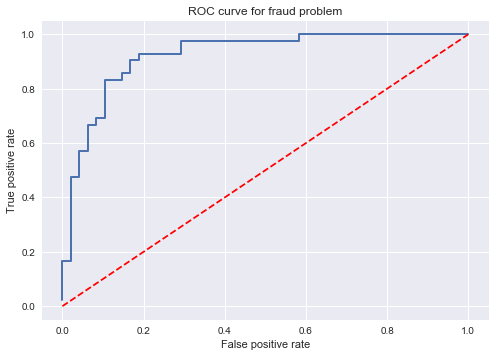

In [198]:
fpr, tpr, thresholds = roc_curve(y_test, lm.predict_proba(X_test_scaled)[:,1])
roc_auc = roc_auc_score(y_test, lm.predict_proba(X_test_scaled)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='r',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test, lm.predict_proba(X_test_scaled)[:,1]))

In [200]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.78      0.90      0.83        48
          1       0.86      0.71      0.78        42

avg / total       0.82      0.81      0.81        90



In [201]:
confusion_matrix(y_test, y_pred)

array([[43,  5],
       [12, 30]])

In [207]:
print('precision is:', precision_score(y_test, y_pred))
print('recall is:', recall_score(y_test, y_pred))
print('f1 is:', f1_score(y_test, y_pred))

precision is: 0.8571428571428571
recall is: 0.7142857142857143
f1 is: 0.7792207792207793


In [278]:
names = ['KNN',
        'Logit',
        'Tree',
        "Forst",
        'SVM',
        'LinearSVM',
        'GaussioanNB',
        'XGboost']

clfs = [(KNeighborsClassifier(n_neighbors=4)), 
        (LogisticRegression(C=1000)),
        (DecisionTreeClassifier()),
        (RandomForestClassifier()),
        (SVC()),
        (LinearSVC()),
        (GaussianNB()),
        (XGBClassifier())
         ]
for name, clf in zip(names, clfs):
    CVScores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='precision')
    print(f'{name} CV_precision is:', np.mean(CVScores))
    
# GNB > logit > linearSVM > forst > SVM > XGboost

KNN CV_precision is: 0.8221153846153847
Logit CV_precision is: 0.808375350140056
Tree CV_precision is: 0.6964523809523809
Forst CV_precision is: 0.8016539231322513
SVM CV_precision is: 0.7772540419676643
LinearSVM CV_precision is: 0.7974723680471426
GaussioanNB CV_precision is: 0.8112280701754386
XGboost CV_precision is: 0.7723232323232324


In [279]:
for name, clf in zip(names, clfs):
    CVScores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='recall')
    print(f'{name} CV_recall is:', np.mean(CVScores))
    
# logit > linearSVM > SVM/XGboost 

KNN CV_recall is: 0.6210526315789473
Logit CV_recall is: 0.8105263157894737
Tree CV_recall is: 0.7263157894736841
Forst CV_recall is: 0.7263157894736842
SVM CV_recall is: 0.7368421052631579
LinearSVM CV_recall is: 0.8
GaussioanNB CV_recall is: 0.6
XGboost CV_recall is: 0.7368421052631579


In [241]:
for name, clf in zip(names, clfs):
    CVScores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='f1')
    print(f'{name} CV_f1 is:', np.mean(CVScores))
    
# logit > lienarSVM > SVM > XGboost > forst

KNN CV_f1 is: 0.7048387096774194
Logit CV_f1 is: 0.8040559121680874
Tree CV_f1 is: 0.7067968316748805
Forst CV_f1 is: 0.7322943553903306
SVM CV_f1 is: 0.7552838089680196
LinearSVM CV_f1 is: 0.7967147598726546
GaussioanNB CV_f1 is: 0.6739519705463978
XGboost CV_f1 is: 0.7512272674396061


# learning curve for base model?

# Feature Enginnering

# GridSearch

# Trying to build different base models

In [236]:
names = ['KNN',
        'Logit',
        'Tree',
        "Forst",
        'SVM',
        'LinearSVM',
        'GaussioanNB',
        'XGboost']

clfs = [(KNeighborsClassifier(n_neighbors=4)), 
        (LogisticRegression(C=1000)),
        (DecisionTreeClassifier()),
        (RandomForestClassifier()),
        (SVC()),
        (LinearSVC()),
        (GaussianNB()),
        (XGBClassifier())
         ]
for name, clf in zip(names, clfs):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    Score = accuracy_score(y_test, y_pred)
    print(f'{name} accuracy is:', Score)

KNN accuracy is: 0.7777777777777778
Logit accuracy is: 0.8111111111111111
Tree accuracy is: 0.7111111111111111
Forst accuracy is: 0.8
SVM accuracy is: 0.8333333333333334
LinearSVM accuracy is: 0.8111111111111111
GaussioanNB accuracy is: 0.8222222222222222
XGboost accuracy is: 0.8


In [235]:
names = ['KNN',
        'Logit',
        'Tree',
        "Forst",
        'SVM',
        'LinearSVM',
        'GaussioanNB',
        'XGboost']

clfs = [(KNeighborsClassifier(n_neighbors=4)), 
        (LogisticRegression(C=1000)),
        (DecisionTreeClassifier()),
        (RandomForestClassifier()),
        (SVC()),
        (LinearSVC()),
        (GaussianNB()),
        (XGBClassifier())
         ]
for name, clf in zip(names, clfs):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    Score = accuracy_score(y_test, y_pred)
    print(f'{name} precision is:', precision_score(y_test, y_pred))

KNN precision is: 0.84375
Logit precision is: 0.8571428571428571
Tree precision is: 0.75
Forst precision is: 0.8709677419354839
SVM precision is: 0.8857142857142857
LinearSVM precision is: 0.8571428571428571
GaussioanNB precision is: 0.8421052631578947
XGboost precision is: 0.8529411764705882


In [237]:
names = ['KNN',
        'Logit',
        'Tree',
        "Forst",
        'SVM',
        'LinearSVM',
        'GaussioanNB',
        'XGboost']

clfs = [(KNeighborsClassifier(n_neighbors=4)), 
        (LogisticRegression(C=1000)),
        (DecisionTreeClassifier()),
        (RandomForestClassifier()),
        (SVC()),
        (LinearSVC()),
        (GaussianNB()),
        (XGBClassifier())
         ]
for name, clf in zip(names, clfs):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    Score = accuracy_score(y_test, y_pred)
    print(f'{name} recall is:', recall_score(y_test, y_pred))

KNN recall is: 0.6428571428571429
Logit recall is: 0.7142857142857143
Tree recall is: 0.6190476190476191
Forst recall is: 0.7619047619047619
SVM recall is: 0.7380952380952381
LinearSVM recall is: 0.7142857142857143
GaussioanNB recall is: 0.7619047619047619
XGboost recall is: 0.6904761904761905


In [253]:
from sklearn.model_selection import GridSearchCV
names = ['KNN',
        'Logit',
        'Tree',
        "Forst",
        'SVM',
        'LinearSVM',
        'GaussioanNB',
        'XGboost']

clfs = [(KNeighborsClassifier(n_neighbors=4)), 
        (LogisticRegression(C=1000)),
        (DecisionTreeClassifier()),
        (RandomForestClassifier()),
        (SVC()),
        (LinearSVC()),
        (GaussianNB()),
        (XGBClassifier())
         ]
for name, clf in zip(names, clfs):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    Score = accuracy_score(y_test, y_pred)
    print(f'{name} f1 is:', f1_score(y_test, y_pred))

KNN f1 is: 0.7297297297297298
Logit f1 is: 0.7792207792207793
Tree f1 is: 0.6749999999999999
Forst f1 is: 0.6666666666666666
SVM f1 is: 0.8051948051948051
LinearSVM f1 is: 0.7792207792207793
GaussioanNB f1 is: 0.8
XGboost f1 is: 0.7631578947368423


In [256]:
models = [('KNN', KNeighborsClassifier),
          ('Logit', LogisticRegression),
          ('Tree', DecisionTreeClassifier),
          ('Forest', RandomForestClassifier),
          ('SVM', SVC),
          ('GaussioanNB', GaussianNB),
          ('XGboost', XGBClassifier)
]

param_choices = [
    {# knn parameter
        'n_neighbors': range(1,21),
        'weights': ['uniform', 'distance']
    },
    {# logit 
        'C': [0.001,0.01,0.1,1,10,100,1000],
        'penalty': ['l1', 'l2']
    },
    {# tree
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]
    },
    {# forst
        'n_estimators': [50,100,200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]
    },
    {# SVM
        'kernel': ['linear','rbf','poly'], 'gamma': [0.0001,0.001,0.01,0.1], 'C': [0.001,0.01,0.1,1,10,100,1000]
         #{'kernel': ['linear'], 'C': [0.001,0.01,0.1,1,10,100,1000]},
         #{'kernel': ['ploy'], 'gamma': [0.0001,0.001,0.01,0.1], 'C': [0.001,0.01,0.1,1,10,100,1000]}
        
    },
    {# gaussionNB
        'priors': [None]
    },
    {# XGboost
        'n_estimators': [50,100,200],
        'max_depth': [1,2,3,4,5],
    }
    
]


grids = {}
for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params, cv=5, scoring='recall')
    grid.fit(X_train_scaled, y_train)
    s = f"{name}: best score: {grid.best_score_}"
    print(s)
    grids[name] = grid
    
# logit > xgboost > SVM > Tree > Forst > 

KNN: best score: 0.7678616831934908
Logit: best score: 0.8105771675565726
Tree: best score: 0.779303330790745
Forest: best score: 0.779303330790745
SVM: best score: 0.7782862954487668
GaussioanNB: best score: 0.5997965929316044
XGboost: best score: 0.7889651665395373
